#  Logistic Regression
#### Import modules

In [1]:
# Import Modules and functions
# ----------------------------
from Functions import *
from Modules   import *

#### Read Dataframe

In [2]:
df    = pd.read_csv('..\\Data\\data_train.csv')
X_aim = pd.read_csv('..\\Data\\features_aim.csv')
# --- Clean and prepare data and Aim -----

X_train, X_test, y_train, y_test, X_aim = CLEAN_All_DATA(df, X_aim)

warnings.filterwarnings("ignore", category=ConvergenceWarning)

#### Define Logistic Regression model

In [3]:
# Logistic Regression with all numerical variables are fetched into PCA

num_pipeline  = Pipeline([('scaler', StandardScaler()),
                          #('pca', PCA(n_components=0.99))
                         ])

preprocessor  = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)])

model_lr      = LogisticRegression(solver       = 'saga',    # 'lbfgs'
                                   max_iter     = 1000, 
                                   class_weight = 'balanced', 
                                   random_state = 42)


pipeline_lr   = Pipeline([('preprocessor'  , preprocessor),
                          ('logisticRegression', model_lr)
                        ])

In [4]:
pipeline_lr.fit(X_train, y_train)

# Evaluate the model:
pred_lr        = pipeline_lr.predict(X_test)
f1_lr          = f1_score(y_test       , pred_lr)
recall_lr      = recall_score(y_test   , pred_lr)
precision_lr   = precision_score(y_test, pred_lr)
accuracy_lr    = accuracy_score(y_test , pred_lr)


lr_metrics     = pd.DataFrame({
                                'Model'    : ['Logistic Regression'],
                                'F1 Score' : [f1_lr],
                                'Recall'   : [recall_lr],
                                'Precision': [precision_lr],
                                'Accuracy' : [accuracy_lr]
                            })

#### Scores and confusion matrix

Scoring of Logistic Regression Classifier with 50% Threshold


Model,F1 Score,Recall,Precision,Accuracy
Logistic Regression,0.383808,0.605201,0.281010,0.749467


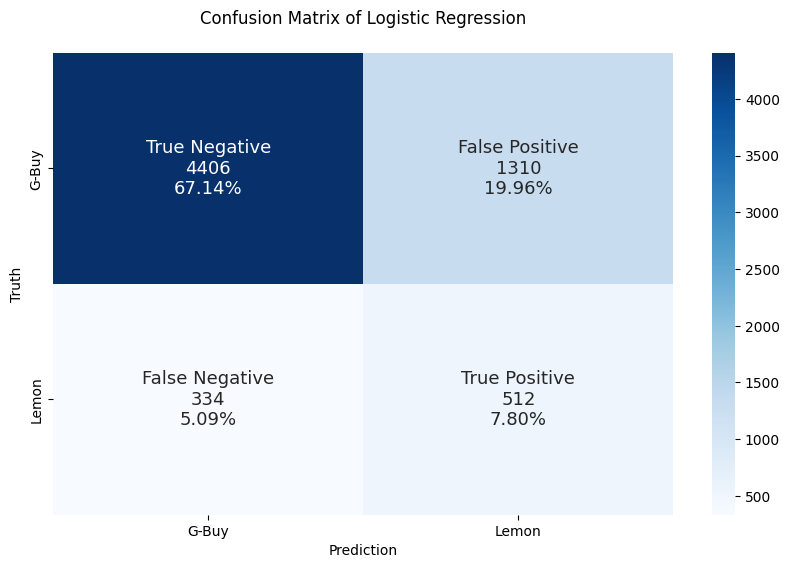

In [5]:
print('Scoring of Logistic Regression Classifier with 50% Threshold')
display(lr_metrics.style.hide())
Confusion_Matrix_Func(y_test, pred_lr, 'Logistic Regression');

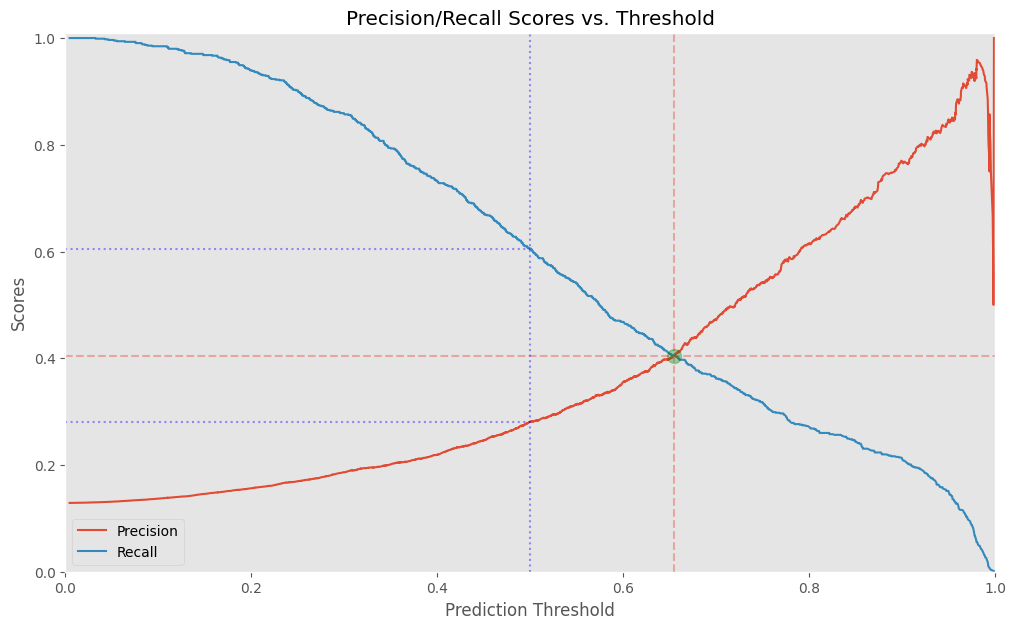

In [6]:
p_curve, r_curve, t_curve =  precision_recall_curve(y_test, pipeline_lr.predict_proba(X_test)[:,1])
# -------------------------------------------------------------------------------------------------
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize= (12,7))

plt.plot(t_curve, p_curve[:-1], label = 'Precision')
plt.plot(t_curve, r_curve[:-1], label = 'Recall')
# ---------------------------------------------------
plt.axvline(0.655, ls='--', alpha=0.4)
plt.axhline(0.405, ls='--', alpha=0.4)
plt.plot(.655, 0.405, 'o', ms=10, alpha = .3, mec='green', mfc='green'); 
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.title('Precision/Recall Scores vs. Threshold')

#----------------------------------------------------------------
plt.axvline(0.5, ls='dotted', alpha=0.4, color = 'blue')
# plt.vlines(x      = 0.5, 
#            ymin  = precision_lr, 
#            ymax  = recall_lr, 
#            ls    = 'dotted',
#            color = 'blue', 
#            alpha = 0.4)
plt.hlines(y     = precision_lr, 
           xmin  = 0, 
           xmax  = 0.5,  
           ls    = 'dotted',
           color = 'blue',
           alpha = 0.4)
plt.hlines(y     = recall_lr, 
           xmin  = 0, 
           xmax  = 0.5,  
           ls    = 'dotted',
           color = 'blue',
           alpha = 0.4)
ax.set_xlim(left=0  , right=1)
ax.set_ylim(bottom=0, top=1.01)
plt.legend()
plt.grid()


#### Optimising the classification according to the scores vs. threshold curve

Scoring of Logistic Regression Classifier


Model,F1 Score,Recall,Precision,Accuracy
Logistic Regression,0.409257,0.397163,0.422111,0.852179


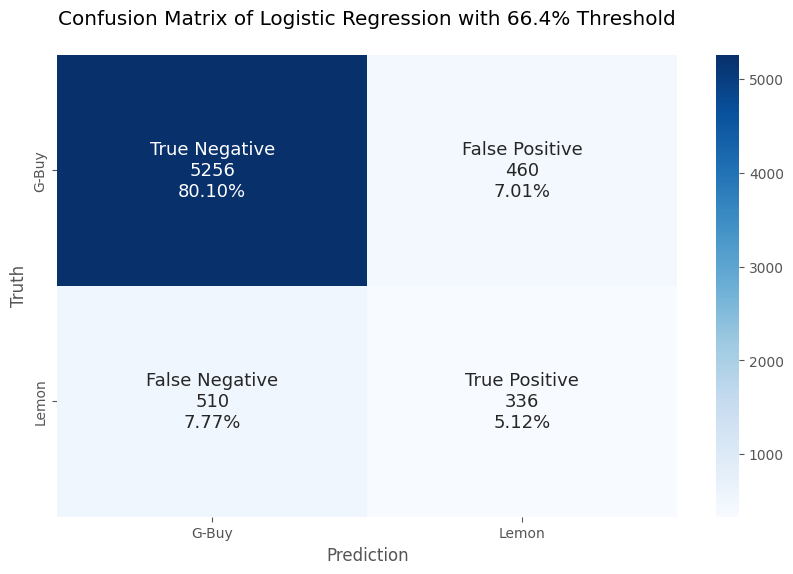

In [8]:
# Evaluate the model:
pred_lr_th         = pipeline_lr.predict_proba(X_test)[:,1] > 0.664         
f1_lr_th           = f1_score(y_test       , pred_lr_th)
recall_lr_th       = recall_score(y_test   , pred_lr_th)
precision_lr_th    = precision_score(y_test, pred_lr_th)
accuracy_lr_th     = accuracy_score(y_test , pred_lr_th)


lr_metrics_th     = pd.DataFrame({
                                'Model'    : ['Logistic Regression'],
                                'F1 Score' : [f1_lr_th],
                                'Recall'   : [recall_lr_th],
                                'Precision': [precision_lr_th],
                                'Accuracy' : [accuracy_lr_th]
                                })
# --------------------------------------------------------------------                                
print('Scoring of Logistic Regression Classifier')
display(lr_metrics_th.style.hide())
Confusion_Matrix_Func(y_test, pred_lr_th, 'Logistic Regression with 66.4% Threshold');

#### Logistic Regression Pipeline and GridSearchCV

In [9]:
num_pipeline   = Pipeline([('scaler', StandardScaler()),
                           ('pca'   , PCA(n_components=0.99))
                         ])

preprocessor   = ColumnTransformer([('num', num_pipeline, num_cols),
                                    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
                                   ])

model_lr       = LogisticRegression(solver       = 'saga', 
                                    max_iter     = 1000, 
                                    class_weight = 'balanced', 
                                    random_state = 42)

pipeline_lr_grid    = Pipeline([('preprocessor', preprocessor),
                           ('logisticRegr', model_lr)
                          ])
# ----------------------------------------------------------------------------------------
param_grid     = {'logisticRegr__C'      : [0.185, 0.019, 0.0195, 0.02],
                  'logisticRegr__penalty': ['l1', 'l2']             #  penalty --> can be added 'elasticnet'
                  }

model_lr_grid = GridSearchCV(estimator  = pipeline_lr_grid, 
                             param_grid = param_grid, 
                             scoring    = 'f1',
                             cv         = 5, 
                             n_jobs     = 8
                           )

#### Model fitting, Scores and confusion matrix

In [10]:
model_lr_grid.fit(X_train, y_train)

# Extract the best estimator
optimised_lr_grid    = model_lr_grid.best_estimator_
optimised_lr_params  = model_lr_grid.best_params_

# Evaluate the Model
pred_lr_grid      = optimised_lr_grid.predict(X_test)
f1_lr_grid        = f1_score(y_test       , pred_lr_grid)
recall_lr_grid    = recall_score(y_test   , pred_lr_grid)
precision_lr_grid = precision_score(y_test, pred_lr_grid)
accuracy_lr_grid  = accuracy_score(y_test , pred_lr_grid)

grid_lr_metrics = pd.DataFrame({
                                'Model'    : ['GridSearch Optimised LR'],
                                'F1 Score' : [f1_lr_grid],
                                'Recall'   : [recall_lr_grid],
                                'Precision': [precision_lr_grid],
                                'Accuracy' : [accuracy_lr_grid]
                               })

#### Optimsied model and hyperparameters

In [11]:
print('Scoring of GridSearch Optimised LR Classifier')
print('Optimised LR Model:'     , optimised_lr_grid)
print("Optimised LR Parameters:", optimised_lr_params)

Scoring of GridSearch Optimised LR Classifier
Optimised LR Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice',
                                                   'MMRCurrentAuctionAveragePrice',
                                                   'MMRCurrentAuctionCleanPrice',
  

#### Scores and confusion matrix

Scoring of GridSearch Optimised LR with 50% Threshold


Model,F1 Score,Recall,Precision,Accuracy
GridSearch Optimised LR,0.397336,0.634752,0.289176,0.751753


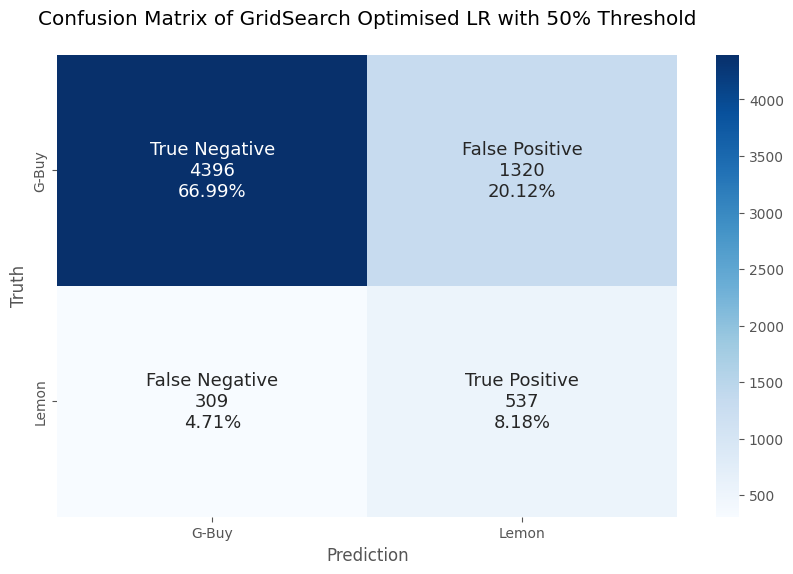

In [12]:
print('Scoring of GridSearch Optimised LR with 50% Threshold')
display(grid_lr_metrics.style.hide())
Confusion_Matrix_Func(y_test, pred_lr_grid, 'GridSearch Optimised LR with 50% Threshold');

#### F1 Score vs Threshold with Max F1 highlighted

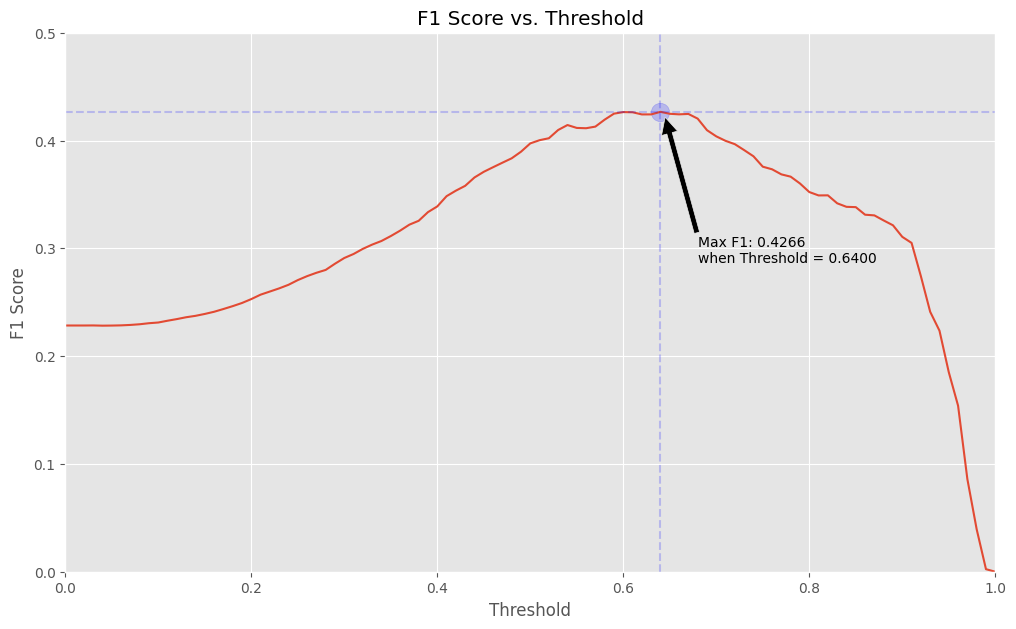

In [13]:
fig, ax = plt.subplots(figsize= (12,7))
f1 = []

threshold = np.linspace(0,1,101)
for level in threshold:
    y_pred  = model_lr_grid.predict_proba(X_test)[:,1] > level
    f1.append(f1_score(y_test, y_pred))
# --------------------------------------------------------------
    
max_f1_index     = np.argmax(f1)
max_f1_threshold = threshold[max_f1_index]
max_f1_value     = f1[max_f1_index]
#---------------------------------------------------------------

sns.lineplot(x   = threshold, y =f1)
plt.scatter([max_f1_threshold], [f1[max_f1_index]], marker='o', s = 175, color='blue', alpha=0.2, label='Max F1')
plt.axvline(x = max_f1_threshold, linestyle='--', color = 'blue', alpha = 0.2)
plt.axhline(y = f1[max_f1_index], linestyle='--', color='blue'  , alpha=0.2)


plt.annotate(f'Max F1: {max_f1_value:.4f} \nwhen Threshold = {max_f1_threshold:.4f}', 
             xy         = (max_f1_threshold + 0.005, max_f1_value - 0.005),
             xytext     = (max_f1_threshold + 0.04, max_f1_value - 0.14),
             arrowprops = dict(facecolor='black'),
             )


plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
ax.set_xlim(left=0  , right=1)
ax.set_ylim(bottom=0, top=0.5);

#### Scores and confusion matrix with F1 maximied 

Scoring of Logistic Regression Classifier with 64.00% Threshold


Model,F1 Score,Recall,Precision,Accuracy
Logistic Regression,0.426600,0.401891,0.454545,0.860713


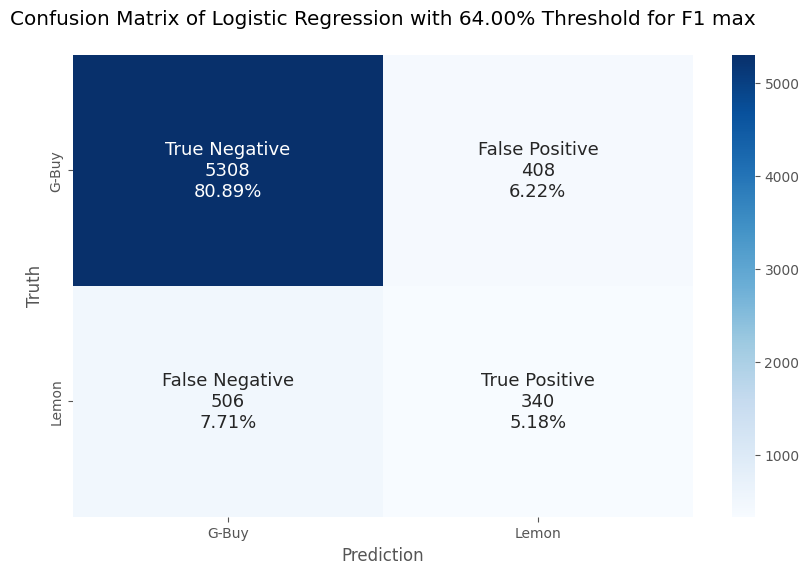

In [15]:
# Evaluate the model:
optimised_lr_grid_f1max  = model_lr_grid.predict_proba(X_test)[:,1] > max_f1_threshold         
f1_lr_grid_f1max         = f1_score(y_test       , optimised_lr_grid_f1max)
recall_lr_grid_f1max     = recall_score(y_test   , optimised_lr_grid_f1max)
precision_lr_grid_f1max  = precision_score(y_test, optimised_lr_grid_f1max)
accuracy_lr_grid_f1max   = accuracy_score(y_test , optimised_lr_grid_f1max)


grid_lr_metrics_f1max     = pd.DataFrame({
                                    'Model'    : ['Logistic Regression'],
                                    'F1 Score' : [f1_lr_grid_f1max],
                                    'Recall'   : [recall_lr_grid_f1max],
                                    'Precision': [precision_lr_grid_f1max],
                                    'Accuracy' : [accuracy_lr_grid_f1max]
                                    })
# --------------------------------------------------------------------                                
print(f'Scoring of Logistic Regression Classifier with {max_f1_threshold:.2%} Threshold')
display(grid_lr_metrics_f1max.style.hide())
Confusion_Matrix_Func(y_test, optimised_lr_grid_f1max, f'Logistic Regression with {max_f1_threshold:.2%} Threshold for F1 max');

#### Precision/Recall Crossover 

(0.0, 1.01)

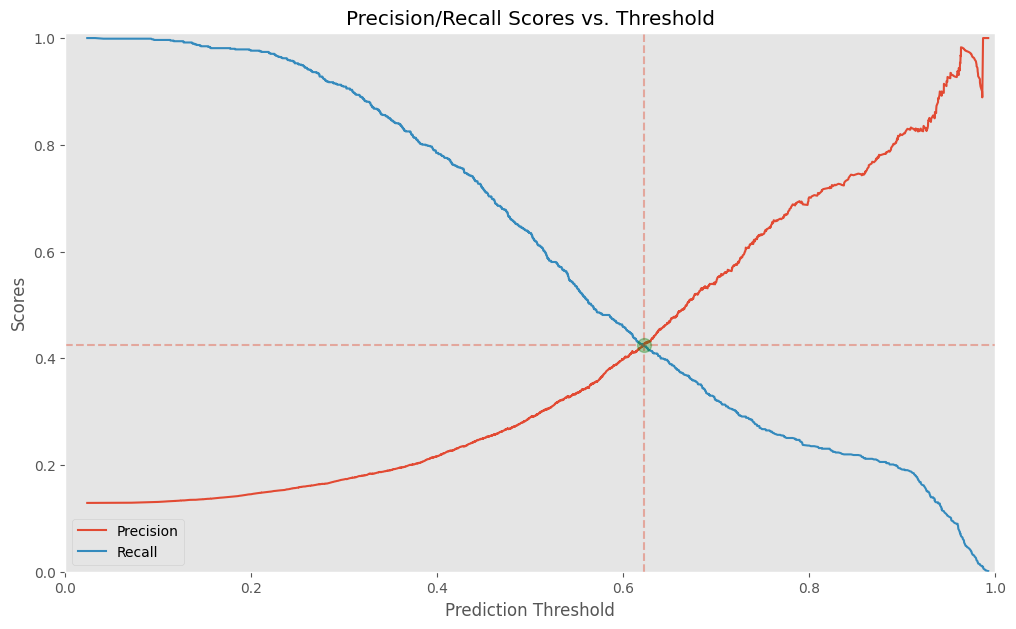

In [16]:
p_curve, r_curve, t_curve =  precision_recall_curve(y_test, model_lr_grid.predict_proba(X_test)[:,1])
# -------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize= (12,7))
plt.style.use('ggplot')
plt.plot(t_curve, p_curve[:-1], label = 'Precision')
plt.plot(t_curve, r_curve[:-1], label = 'Recall')
# ---------------------------------------------------
plt.axvline(0.622, ls='--', alpha=0.4)
plt.axhline(0.424, ls='--', alpha=0.4)
plt.plot(.622, 0.424, 'o', ms=10, alpha = .3, mec='green', mfc='green',mew=1); #mec='orange', mfc='orange', 
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.title('Precision/Recall Scores vs. Threshold')
plt.legend()
plt.grid()
ax.set_xlim(left=0  , right=1)
ax.set_ylim(bottom=0, top=1.01)


#### Optimising the Model Precision/Recall Crossover

Scoring of Logistic Regression Classifier with 62.2% Threshold


Model,F1 Score,Recall,Precision,Accuracy
Logistic Regression,0.424674,0.423168,0.426190,0.852179


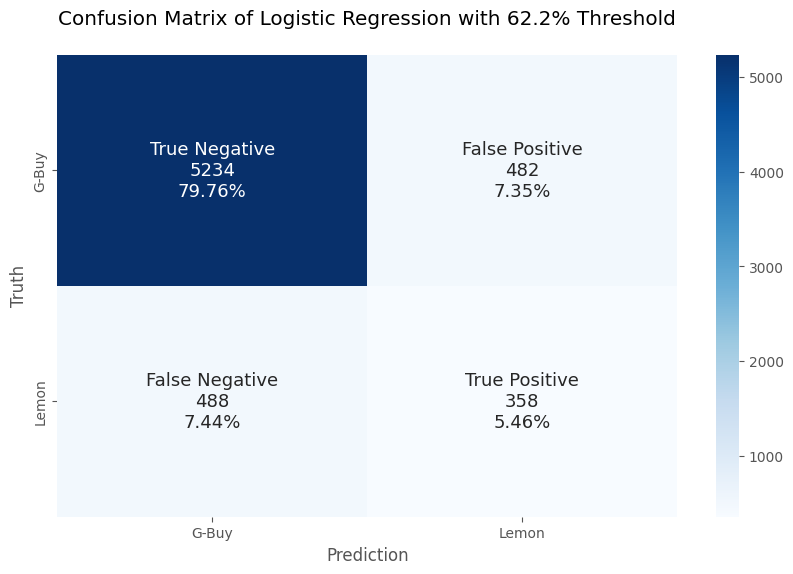

In [17]:
optimised_lr_grid_cross  = model_lr_grid.predict_proba(X_test)[:,1] > 0.622        
f1_lr_grid_cross         = f1_score(y_test       , optimised_lr_grid_cross)
recall_lr_grid_cross     = recall_score(y_test   , optimised_lr_grid_cross)
precision_lr_grid_cross  = precision_score(y_test, optimised_lr_grid_cross)
accuracy_lr_grid_cross   = accuracy_score(y_test , optimised_lr_grid_cross)


grid_lr_metrics_cross    = pd.DataFrame({
                                    'Model'    : ['Logistic Regression'],
                                    'F1 Score' : [f1_lr_grid_cross],
                                    'Recall'   : [recall_lr_grid_cross],
                                    'Precision': [precision_lr_grid_cross],
                                    'Accuracy' : [accuracy_lr_grid_cross]
                                    })
# --------------------------------------------------------------------                                
print('Scoring of Logistic Regression Classifier with 62.2% Threshold')
display(grid_lr_metrics_cross.style.hide())
Confusion_Matrix_Func(y_test, optimised_lr_grid_cross, 'Logistic Regression with 62.2% Threshold');

#### Trade between Precision and Recall
Higher recall values results in low precision and vice versa, the final values depends on the user case. 

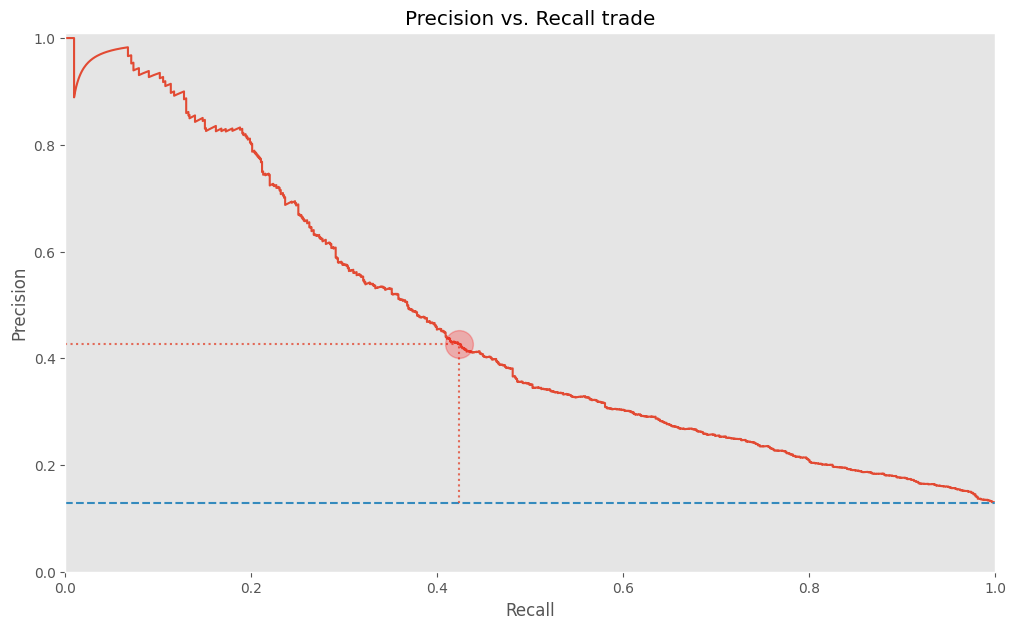

In [18]:
fig, ax =plt.subplots(figsize = (12,7))
# ---------------------------------------------
baseline = len(y_test[y_test == 1])/len(y_test)

plt.plot(r_curve, p_curve, label = 'LR')
plt.plot([0, 1], [baseline, baseline], linestyle = '--', label = 'Baseline')

plt.hlines(y     = precision_lr_grid_cross, 
           xmin  = 0, 
           xmax  = recall_lr_grid_cross,  
           ls    = 'dotted', 
           alpha = 0.8)

plt.vlines(x      = recall_lr_grid_cross, 
           ymin  = baseline, 
           ymax  = precision_lr_grid_cross, 
           ls    = 'dotted', 
           alpha = 0.8)

plt.plot(recall_lr_grid_cross, precision_lr_grid_cross, 
         marker ='o', 
         ms     = 20, 
         alpha  = 0.25, 
         mec    = 'red', 
         mfc    = 'red',
         ); 
ax.set_title('Precision vs. Recall trade')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_xlim(left=0  , right=1)
ax.set_ylim(bottom=0, top=1.01)
ax.grid();

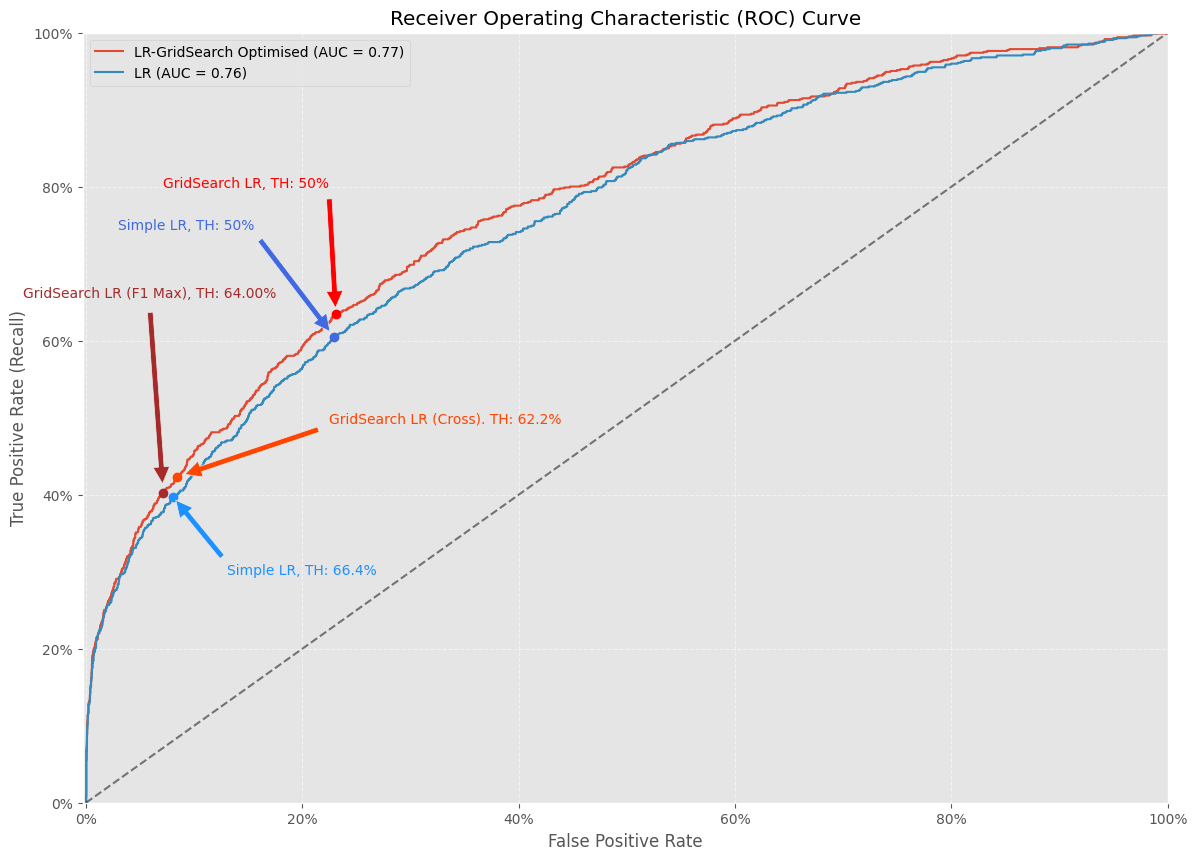

In [42]:
fig, ax = plt.subplots(figsize =(14,10))
# ---------------------------------------------------------------------------------

pred_proba_lr_grid  = optimised_lr_grid.predict_proba(X_test)[:,1]
fpr_lr_grid, tpr_lr_grid, thr_lr_grid = roc_curve(y_test, pred_proba_lr_grid)
auc_score_lr_grid = auc(fpr_lr_grid, tpr_lr_grid)
#----------------------------------------------------------------------------------

y_probs_lr = pipeline_lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thr_lr = roc_curve(y_test, y_probs_lr)
auc_score_lr = auc(fpr_lr, tpr_lr)
# ---------------------------------------------------------------------------------

plt.plot(fpr_lr_grid,tpr_lr_grid, label = f"LR-GridSearch Optimised (AUC = {auc_score_lr_grid:.2f})")
plt.plot(fpr_lr, tpr_lr, label = f"LR (AUC = {auc_score_lr:.2f})")
plt.plot([0,1],[0,1], 'k--', alpha = 0.5)
#---------------------------------------------------------------------------------- 

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.ylabel('True Positive Rate (Recall)')
plt.xlabel('False Positive Rate')
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.legend()
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlim(left=-0.003 , right=1)
ax.set_ylim(bottom=0, top=1)




# ----------------------------------------------------------------------------------
# Simple LR 50% Threshold
cm_fpr_lr, cm_recall_lr = fpr_tpr(y_test, pred_lr)
plt.plot(cm_fpr_lr, cm_recall_lr, 'o', ms=6, mec='royalblue', mfc='royalblue',mew=1)
ax.annotate('Simple LR, TH: 50%', xy=(cm_fpr_lr, cm_recall_lr), xytext=(cm_fpr_lr - 0.2, cm_recall_lr + 0.14),
            arrowprops=dict(facecolor='royalblue', shrink=0.05), color='royalblue'
            )
# ----------------------------------------------------------------------------------
# Simple LR with Threshold 66.4%
cm_fpr_lr_th, cm_recall_lr_th  = fpr_tpr(y_test, pred_lr_th)
plt.plot(cm_fpr_lr_th, cm_recall_lr_th, 'o', ms=6, mec='dodgerblue', mfc='dodgerblue',mew=1)
ax.annotate('Simple LR, TH: 66.4%', xy=(cm_fpr_lr_th, cm_recall_lr_th), xytext=(cm_fpr_lr_th + 0.05, cm_recall_lr_th - 0.1),
            arrowprops=dict(facecolor='dodgerblue', shrink=0.05), color = 'dodgerblue'
            )
# ----------------------------------------------------------------------------------
# Optimised Grid LR 50% Threshold
cm_fpr_lr_grid, cm_recall_lr_grid = fpr_tpr(y_test, pred_lr_grid)
plt.plot(cm_fpr_lr_grid, cm_recall_lr_grid, 'o', ms=6, mec='red', mfc='red',mew=1)
ax.annotate('GridSearch LR, TH: 50%', xy=(cm_fpr_lr_grid, cm_recall_lr_grid), xytext=(cm_fpr_lr_grid - 0.16, cm_recall_lr_grid + 0.165),
            arrowprops=dict(facecolor='red', shrink=0.05), color='red'
            )
# ----------------------------------------------------------------------------------
# Optimised Grid LR f1 optimised precision/recall cross
cm_fpr_lr_grid_cross, cm_recall_lr_grid_cross = fpr_tpr(y_test, optimised_lr_grid_cross)
plt.plot(cm_fpr_lr_grid_cross, cm_recall_lr_grid_cross, 'o', ms=6, mec='orangered', mfc='orangered',mew=1)
ax.annotate('GridSearch LR (Cross). TH: 62.2%', xy=(cm_fpr_lr_grid_cross, cm_recall_lr_grid_cross), xytext=(cm_fpr_lr_grid_cross + 0.14, cm_recall_lr_grid_cross + 0.07),
            arrowprops=dict(facecolor='orangered', shrink=0.05), color='orangered'
            )
# ----------------------------------------------------------------------------------
# Optimised Grid LR f1 optimised
cm_fpr_lr_grid_f1max, cm_recall_lr_grid_f1max = fpr_tpr(y_test, optimised_lr_grid_f1max)
plt.plot(cm_fpr_lr_grid_f1max, cm_recall_lr_grid_f1max, 'o', ms=6, mec='brown', mfc='brown',mew=1)
ax.annotate(f'GridSearch LR (F1 Max), TH: {max_f1_threshold:.2%}', xy=(cm_fpr_lr_grid_f1max, cm_recall_lr_grid_f1max), xytext=(cm_fpr_lr_grid_f1max - 0.13, cm_recall_lr_grid_f1max + 0.255),
            arrowprops=dict(facecolor='brown', shrink=0.05), color='brown'
            );

#### Save the optimised model as pickle

In [20]:
# Save the model as it is quite demanding

directory_path = r"D:\Visual Studio Code\Used Cars Sales\Pickle"
filename = "optimised_GridSearch_LR_saga.p"

pickle.dump(model_lr_grid, open(directory_path + "\\" + filename, "wb"))